## Support Vector Machines

<hr>

### Agenda
1. Introduction to Support Vector Machines
2. Maximal Margin Classifier
3. Soft Margin Classifier
2. SVM Algorithm for Classification
3. SVM 
4. SVM for Regression
5. Hyper-parameters in SVM

<hr>

### 1. Introduction to Support Vector Machines
* Supervised Learning method used for Classification, Regression & Outlier Detection
* SVMs' are effective in high dimension spaces
* Uses subset of training data, so memory efficient
* Effective in higher dimensional data
* Also, in situations where dimension is greater than rows

### 2. Maximal Margin Classifier
* Objective is to find a line( or hyperplane ) which maximizes the separation between data of different classes
* The distance between the line and the closest data points is referred to as the margin.
* The best or optimal line or hyper-plane is that can separate the two classes is the line that as the largest margin.

<img src="https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcQkOQ1Q4Xr1J-J8qbwOZxbV9HmwOs2o2iHo2dLRxVxjq1R0MibU0A">
* Hyperplane is learnt from training data & objective is to maximize the margin

### 3. Soft Margin Classifier
* In real world, data is always messed up & there is no clear separation of boundries
* With Soft Margin Classifier, few data points are allowed to be misclassified

<img src="https://www.researchgate.net/profile/Catarina_Moreira2/publication/260283043/figure/fig12/AS:297261608259590@1447884098130/Figure-A14-Soft-margin-linear-SVM-classifier.png" width="300px">

* The C parameter trades off correct classification of training examples against maximization of the decision function’s margin. 
* For larger values of C, a smaller margin will be accepted if the decision function is better at classifying all training points correctly. 
* A lower C will encourage a larger margin, therefore a simpler decision function, at the cost of training accuracy. 
* In other words``C`` behaves as a regularization parameter in the SVM.

### 4. Support Vector Machine
* For data linearly separable, SVM works like above mentioned Soft Margin Classifier
* Data which is non-linearly separable 

<img src="https://cdn-images-1.medium.com/max/1000/1*C3j5m3E3KviEApHKleILZQ.png" width="300px">

* SVM supports configurable kernel functions which has ability to transform data to higher dimension.
* Check if decision boundry exists now to separate the classes in higher dimension.
* Transform the decision boundry to original dimension

In [5]:
from sklearn.datasets import make_circles
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

In [8]:
X, y = make_circles(n_samples=1000, noise=.05, factor=.5)

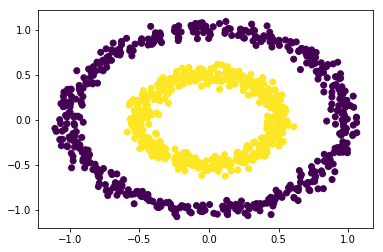

In [9]:
plt.scatter(X[:,0],X[:,1],c=y,)

### Doing transformation manually

In [10]:
col = np.sum(np.square(X),axis=1)

In [11]:
Z  = np.hstack([X,col.reshape(-1,1)])

In [12]:
from mpl_toolkits.mplot3d import Axes3D

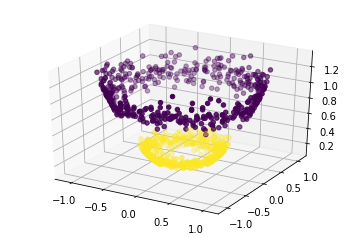

In [13]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter3D(xs=Z[:,0],ys=Z[:,1],zs=Z[:,2],c=y)

* Now, we can see a possible plane separating the data
* SVM does all these thing using libraries

### Understanding Kernels
* Kernels are integral part of SVM which is responsible of transforming non-linearly separable data to higher dimension such that they are linearly seprable
* Different types of kernels are supported by SVM
* Every kernel has different way to transforming data into higher dimension
* Linear, Polynomial, RBF, Sigmoid & your own custom kernel

#### Linear Kernels
* Always take simple to complex approach.
* If linear separation is possible between classes, linear kernels would work & not otherwise

In [14]:
from sklearn.datasets import load_iris
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [15]:
iris_data = load_iris()

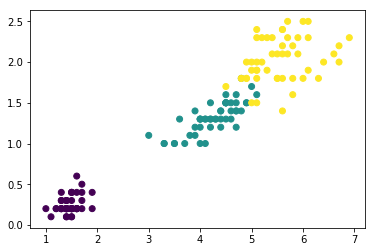

In [16]:
plt.scatter(iris_data.data[:,2], iris_data.data[:,3],c=iris_data.target)

In [9]:
from sklearn.svm import SVC

In [18]:
svc = SVC(kernel='linear')

In [19]:
svc.fit(iris_data.data[:,[2,3]], iris_data.target)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='linear', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

In [20]:
X = iris_data.data[:,[2,3]]

In [21]:
y = iris_data.target

In [22]:
h = .02
x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

In [23]:
Z = svc.predict(np.c_[xx.ravel(), yy.ravel()])

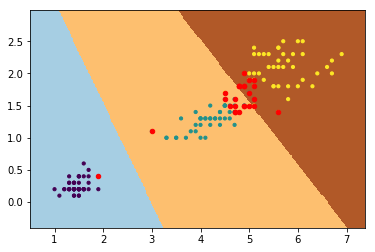

In [24]:
Z = Z.reshape(xx.shape)
plt.pcolormesh(xx, yy, Z, cmap=plt.cm.Paired)
plt.scatter(X[:,0],X[:,1],c=y,s=10)
plt.scatter(svc.support_vectors_[:,0], svc.support_vectors_[:,1], c='r',s=20)

* We can see linear separators

In [25]:
svc.support_vectors_

array([[1.9, 0.4],
       [4.7, 1.4],
       [4.9, 1.5],
       [4.6, 1.5],
       [4.7, 1.6],
       [4.7, 1.4],
       [4.8, 1.8],
       [4.9, 1.5],
       [4.8, 1.4],
       [5. , 1.7],
       [5.1, 1.6],
       [4.5, 1.6],
       [4.7, 1.5],
       [3. , 1.1],
       [4.5, 1.7],
       [5. , 1.5],
       [4.9, 2. ],
       [4.9, 1.8],
       [4.8, 1.8],
       [4.9, 1.8],
       [5.1, 1.5],
       [5.6, 1.4],
       [4.8, 1.8],
       [5.1, 1.9],
       [5. , 1.9],
       [5.1, 1.8]])

#### Polynomial Kernel
* Transforming data to higher order polynomial.

<img src="https://github.com/awantik/machine-learning-slides/blob/master/svm24.PNG?raw=true" width="300px">

In [2]:
from sklearn.datasets import make_moons

In [27]:
X,Y = make_moons(n_samples=1000, noise=.05)

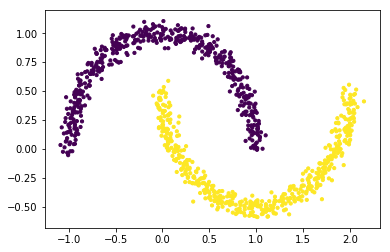

In [28]:
plt.scatter(X[:,0], X[:,1], c=Y, s=10)

In [29]:
svc = SVC(kernel='poly')

In [30]:
svc.fit(X,Y)

C:\Users\awant\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='poly', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

In [31]:
h = .02
x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

In [32]:
Z = svc.predict(np.c_[xx.ravel(), yy.ravel()])

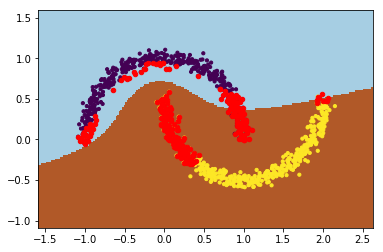

In [33]:
Z = Z.reshape(xx.shape)
plt.pcolormesh(xx, yy, Z, cmap=plt.cm.Paired)
plt.scatter(X[:,0],X[:,1],c=Y,s=10)
plt.scatter(svc.support_vectors_[:,0], svc.support_vectors_[:,1], c='r',s=20)

C:\Users\awant\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


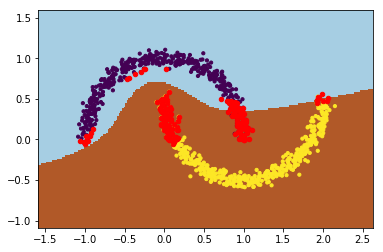

In [34]:
svc = SVC(kernel='poly', C=10)
svc.fit(X,Y)
Z = svc.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.pcolormesh(xx, yy, Z, cmap=plt.cm.Paired)
plt.scatter(X[:,0],X[:,1],c=Y,s=10)
plt.scatter(svc.support_vectors_[:,0], svc.support_vectors_[:,1], c='r',s=20)

#### RBF Kernel
* As we see in the above example, linear or polynomial decision boundery cannot separate classes
* RBF is a kernel trick to transform data non-linearly & then predict the separator

C:\Users\awant\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


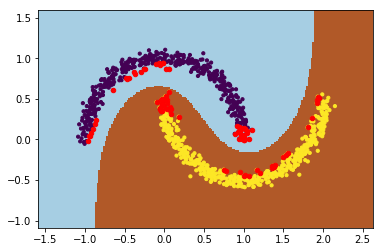

In [35]:
svc = SVC(kernel='rbf')
svc.fit(X,Y)
Z = svc.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.pcolormesh(xx, yy, Z, cmap=plt.cm.Paired)
plt.scatter(X[:,0],X[:,1],c=Y,s=10)
plt.scatter(svc.support_vectors_[:,0], svc.support_vectors_[:,1], c='r',s=20)

### Understanding Hyper-parameters : C
* The C parameter trades off correct classification of training examples against maximization of the decision function’s margin.
* For larger values of C, a smaller margin will be accepted if the decision function is better at classifying all training points correctly. 
* A lower C will encourage a larger margin, therefore a simpler decision function, at the cost of training accuracy.

In [12]:
X,Y = make_moons(n_samples=100, noise=.3)

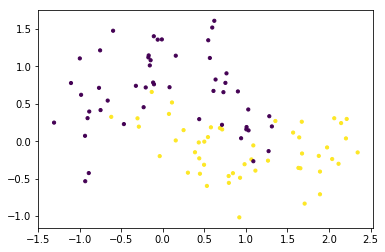

In [13]:
plt.scatter(X[:,0], X[:,1], c=Y, s=10)

In [14]:
h = .02
x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

C:\Users\awant\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


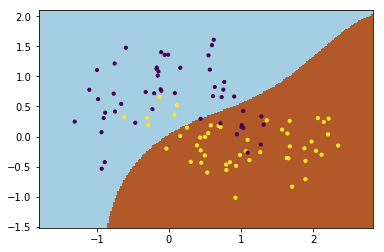

In [20]:
svc = SVC(kernel='rbf', C=0.1)
svc.fit(X,Y)
Z = svc.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.pcolormesh(xx, yy, Z, cmap=plt.cm.Paired)
plt.scatter(X[:,0],X[:,1],c=Y,s=10)

C:\Users\awant\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


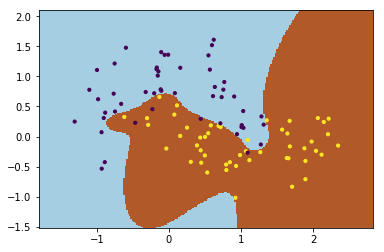

In [21]:
svc = SVC(kernel='rbf', C=100000)
svc.fit(X,Y)
Z = svc.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.pcolormesh(xx, yy, Z, cmap=plt.cm.Paired)
plt.scatter(X[:,0],X[:,1],c=Y,s=10)

#### Understanding Hyper-parameter : Gamma
* Gamma is a parameter to handle non-linear classification
* By increasing value of gamma, we are increasing importance of each point

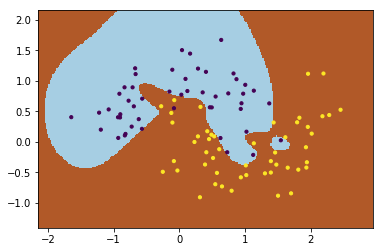

In [70]:
svc = SVC(kernel='rbf', C=100000, gamma=1)
svc.fit(X,Y)
Z = svc.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.pcolormesh(xx, yy, Z, cmap=plt.cm.Paired)
plt.scatter(X[:,0],X[:,1],c=Y,s=10)

* Using Grid-Search, we need to find right combination of kernel, C & gamma

### SVM for Regression
* Target data is continues in nature
* The relationship between feature data & target can be linear as well as non-linear.
* Based on that the kernel can be chosen - linear, poly or rbf

In [71]:
X = np.sort(5 * np.random.rand(40, 1), axis=0)
y = np.sin(X).ravel()

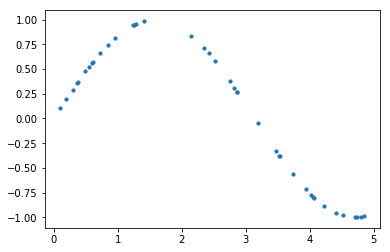

In [75]:
plt.scatter(X, y,s=10)

In [76]:
from sklearn.svm import SVR

In [77]:
svrs = [SVR(kernel='linear'), SVR(kernel='poly'), SVR(kernel='rbf')]

In [78]:
for model in svrs:
    model.fit(X,y)

C:\Users\awant\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\awant\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


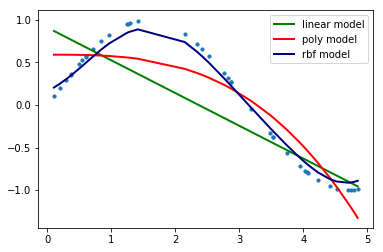

In [93]:
lw = 2
plt.scatter(X, y,s=10)
plt.plot(X, svrs[0].predict(X), color='green', lw=lw, label='linear model')
plt.plot(X, svrs[1].predict(X), color='red', lw=lw, label='poly model')
plt.plot(X, svrs[2].predict(X), color='navy', lw=lw, label='rbf model')
plt.legend()

### Understanding Custom Kernel
* Apart from inbuilt kernals for transforming data, we can write our own custom kernels

In [117]:
def my_kernel(X,Y):
    return np.dot(X, Y.T)

In [118]:
X, y = make_circles(n_samples=1000, noise=.05, factor=.5)

In [119]:
svc = SVC(kernel=my_kernel)

In [120]:
svc.fit(X,y)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel=<function my_kernel at 0x0000019F2F5FED08>, max_iter=-1,
  probability=False, random_state=None, shrinking=True, tol=0.001,
  verbose=False)

In [116]:
X.shape[0]

1000

In [128]:
iris = load_iris()
X = iris.data[:, :2]  # we only take the first two features. We could
                      # avoid this ugly slicing by using a two-dim dataset
Y = iris.target


def my_kernel(X, Y):
    """
    We create a custom kernel:

                 (2  0)
    k(X, Y) = X  (    ) Y.T
                 (0  1)
    """
    M = np.array([[2, 0], [0, 1.0]])
    res = np.dot(np.dot(X, M), Y.T)
    print (res.shape)
    return res


h = .02  # step size in the mesh

# we create an instance of SVM and fit out data.
clf = SVC(kernel=my_kernel)
clf.fit(X, Y)

(150, 150)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel=<function my_kernel at 0x0000019F2F5FEC80>, max_iter=-1,
  probability=False, random_state=None, shrinking=True, tol=0.001,
  verbose=False)